In [2]:
%pip install pandas scikit-learn nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

df = pd.read_csv('dataset.csv', encoding='ISO-8859-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

df.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pickle

# Download necessary NLTK resources
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sriha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sriha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sriha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sriha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
def preprocessor(txt):
    txt = re.sub(r'http\S+', '', txt)  # Remove URLs
    txt = re.sub(r'@\w+', '', txt)  # Remove mentions
    txt = re.sub(r'#', '', txt)  # Remove hashtags
    txt = re.sub(r'[^a-zA-Z\s]', '', txt)  # Remove non-alphabetic characters
    txt = txt.lower()  # Convert to lowercase
    tokens = word_tokenize(txt)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [6]:
from tqdm import tqdm

# Apply preprocessing with a progress bar
tqdm.pandas()
df['clean_txt'] = df['text'].progress_apply(preprocessor)

100%|██████████| 1600000/1600000 [04:52<00:00, 5464.30it/s]


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDV
import pickle

vectorizer = TFIDV(max_features=50000,ngram_range=(1, 3))
X = vectorizer.fit_transform(df['clean_txt'])
y = df['polarity']

with open('tfidf_vectorizer.pkl', 'wb') as vect_file:
    pickle.dump(vectorizer, vect_file)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearSVC()
model.fit(X_train, y_train)

c:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [9]:
with open('samodel.pkl','wb') as f:
    pickle.dump(model,f)

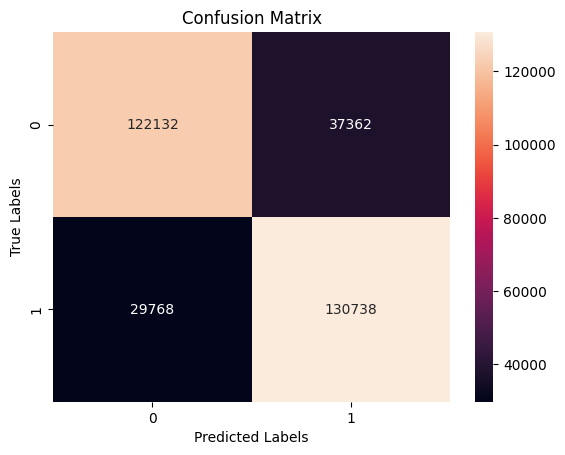

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
